## Potus Visitors Analysis 2015

In December 2009, the White House started publishing records of visitors to the White House. Over a seven-year span, almost six million visitor records were published. The records contain data from the WAVES (Workers and Visitors Entry System) appointment system that is used to make appointments for all White House visitors, excluding staff members and other people not categorized as visitors.

### Data Dictionary
* name: The name of the visitor.
* appt_made_date: The date and time that the appointment was created.
* appt_start_date: The date and time that the appointment was scheduled to start.
* appt_end_date: The date and time that the appointment was scheduled to end.
* visitee_namelast: The last name of the visitee (the person the visitor was meeting with).
* visitee_namefirst: The first name of the visitee.
* meeting_room: The room in which the appointment was scheduled.
* description: Optional comments added by the WAVES operator.

### Analysis Goals:
* Calculate the month with the most visitors.
* Calculate the most common time that visits occurred.
* Calculate summary statistics on visit length and how far ahead visits are booked.
* Produce neatly formatted summaries of daily visits.

In [16]:
## Import the input dataset
from csv import reader
opened_file = open('potus_visitors_2015.csv')
read_file=reader(opened_file)
potus=list(read_file)
potus_header=potus[0]
potus=potus[1:]

In [17]:
potus_header

['name',
 'appt_made_date',
 'appt_start_date',
 'appt_end_date',
 'visitee_namelast',
 'visitee_namefirst',
 'meeting_room',
 'description']

In [18]:
#Checking top 5 rows of the data
potus[:5]

[['Joshua T. Blanton',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Jack T. Gutting',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Bradley T. Guiles',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Loryn F. Grieb',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Travis D. Gordon',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard']]

In [19]:
## Ways to import datetime module and various classes
import datetime as dt
##Signature of datetime class - 24 hour time
## datetime.datetime(year, month, day, hour=0, minute=0, second=0)
ibm_founded = dt.datetime(1911,6,16)
print(ibm_founded)

1911-06-16 00:00:00


In [20]:
man_on_moon = dt.datetime(1969,7,20,20,17)
print(man_on_moon)

1969-07-20 20:17:00


* Create a string date_format that specifies the format of the appt_start_date column:
* The format of the app_start_date column is {month}/{day}/{two digit year} {hour 24hr time}:{minute}.
* Substitute each of the values inside braces with the appropriate strftime code from the table above.
* Iterate over each row in the potus list of lists:
* Assign the appt_start_date column, found at index 2 of each row, to a variable.
* Use the datetime.strptime() constructor to convert the variable from a string to a datetime object, using the date_format string you created earlier.
* Assign the datetime object back to index 2 of the row.

In [21]:
#Changing the Appointment start date from string to datetime object
for row in potus:
    appt_start_date=row[2]
    date_format = dt.datetime.strptime(appt_start_date,"%m/%d/%y %H:%M")
    row[2]=date_format

In [22]:
# Checking the value of appointment start date
potus[:5]

[['Joshua T. Blanton',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Jack T. Gutting',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Bradley T. Guiles',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Loryn F. Grieb',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Travis D. Gordon',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard']]

The datetime class has a number of attributes which make it easy to retrieve the various parts that make up the date stored within the object:

* datetime.day: The day of the month.
* datetime.month: The month of the year.
* datetime.year: The year.
* datetime.hour: The hour of the day.
* datetime.minute: The minute of the hour

* strptime >> str-p-time >> string parse time
* strftime >> str-f-time >> string format time

In [24]:
## Checking the number of visitors per month
visitors_per_month={}
for row in potus:
    start_date=row[2]
    dt_string = dt.datetime.strftime(start_date,"%B,%Y")
    if dt_string not in visitors_per_month:
        visitors_per_month[dt_string]=1
    else:
        visitors_per_month[dt_string]+=1

In [25]:
print(visitors_per_month)

{'January,2015': 1248, 'February,2015': 2165, 'March,2015': 2262, 'April,2015': 4996, 'May,2015': 3013, 'June,2015': 7743, 'July,2015': 2930, 'August,2015': 1350, 'September,2015': 4416, 'October,2015': 3669, 'November,2015': 1133, 'December,2015': 13029}


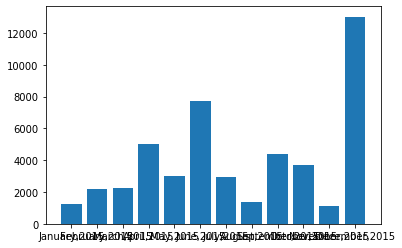

In [30]:
#Checking the trend
import matplotlib.pyplot as plt

plt.bar(range(len(visitors_per_month)), list(visitors_per_month.values()), align='center')
plt.xticks(range(len(visitors_per_month)), list(visitors_per_month.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

### datetime.time
Syntax for datetime.time class:

datetime.time(hour=0, minute=0, second=0, microsecond=0)

The datetime.time class has a number of attributes:

time.hour: The hour of the day.
time.minute: The minute of the hour
time.second: The second of the minute

datetime.time class doesn't have any time.strptime() method but we can use datetime.strptime() and then use datetime.time() to get the time object.
time.strftime() is present in the datetime.time class.

In [34]:
appt_times=[]
for row in potus:
    start_date=row[2]
    time_format=start_date.time()
    appt_times.append(time_format)
    
print(appt_times)

[datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.time(9, 30), datetime.

In [35]:
min_time=min(appt_times)
max_time=max(appt_times)

In [36]:
min_time

datetime.time(6, 0)

In [37]:
max_time

datetime.time(21, 30)

### Timedelta
Operation	Explanation	Resultant Type
* datetime - datetime	Calculate the time between two specific dates/times	timedelta
* datetime - timedelta	Subtract a time period from a date or time.	datetime
* datetime + timedelta	Add a time period to a date or time.	datetime
* timedelta + timedelta	Add two periods of time together	timedelta
* timedelta - timedelta	Calculate the difference between two time periods.	timedelta

In [40]:
dt_1 = dt.datetime(1981, 1, 31)
dt_2 = dt.datetime(1984, 6, 28)
dt_3 = dt.datetime(2016, 5, 24)
dt_4 = dt.datetime(2001, 1, 1, 8, 24, 13)

In [44]:
#Time between dt_1 and dt_2
answer_1=dt_2-dt_1
print(answer_1)

1244 days, 0:00:00


In [56]:
##from datetime import datetime, timedelta
answer_2=dt_3 + dt.timedelta(days=56)
print(answer_2)

2016-07-19 00:00:00


In [55]:
answer_3=dt_4 - dt.timedelta(seconds=3600)
print(answer_3)

2001-01-01 07:24:13


In [57]:
## Analysing length of meetings
for row in potus:
    end_date = row[3]
    end_date = dt.datetime.strptime(end_date, "%m/%d/%y %H:%M")
    row[3] = end_date
appt_lengths = {}

for row in potus:
    start_date = row[2]
    end_date = row[3]
    length = end_date - start_date
    if length not in appt_lengths:
        appt_lengths[length] = 1
    else:
        appt_lengths[length] += 1

min_length = min(appt_lengths)
max_length = max(appt_lengths)

In [66]:
appt_lengths

{datetime.timedelta(seconds=52140): 1213,
 datetime.timedelta(seconds=50340): 1543,
 datetime.timedelta(seconds=48540): 696,
 datetime.timedelta(seconds=46740): 681,
 datetime.timedelta(seconds=44940): 357,
 datetime.timedelta(seconds=41340): 1115,
 datetime.timedelta(seconds=53940): 511,
 datetime.timedelta(seconds=17940): 301,
 datetime.timedelta(seconds=47040): 2,
 datetime.timedelta(seconds=43140): 1041,
 datetime.timedelta(seconds=39540): 1548,
 datetime.timedelta(seconds=37740): 5897,
 datetime.timedelta(seconds=35940): 996,
 datetime.timedelta(seconds=34140): 921,
 datetime.timedelta(seconds=21540): 8173,
 datetime.timedelta(seconds=30540): 2855,
 datetime.timedelta(seconds=28740): 2027,
 datetime.timedelta(seconds=32340): 862,
 datetime.timedelta(seconds=49140): 12,
 datetime.timedelta(seconds=24240): 103,
 datetime.timedelta(seconds=44040): 39,
 datetime.timedelta(seconds=42840): 6,
 datetime.timedelta(seconds=35040): 119,
 datetime.timedelta(seconds=32640): 13,
 datetime.time

In [58]:
print(min_length)

2:29:00


In [59]:
print(max_length)

16 days, 12:59:00


In [60]:
potus[:5]

[['Joshua T. Blanton',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  datetime.datetime(2015, 1, 6, 23, 59),
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Jack T. Gutting',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  datetime.datetime(2015, 1, 6, 23, 59),
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Bradley T. Guiles',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  datetime.datetime(2015, 1, 6, 23, 59),
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Loryn F. Grieb',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  datetime.datetime(2015, 1, 6, 23, 59),
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Travis D. Gordon',
  '2014-12-18T00:00:00',
  datetime.datetime(2015, 1, 6, 9, 30),
  datetime.datetime(2015, 1, 6, 23, 59),
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard']]

In [61]:
## Find the visitor who spent the most amount of time at the White House. Both start and end date are now in datetime
visitor_visit_length={}
for row in potus:
    visit_length=0
    visitor=row[0]
    visit_length=row[3]-row[2]
    if visitor not in visitor_visit_length:
        visitor_visit_length[visitor] = visit_length
    else:
        visitor_visit_length[visitor]+= visit_length

In [65]:
visitor_visit_length

{'Joshua T. Blanton': datetime.timedelta(seconds=52140),
 'Jack T. Gutting': datetime.timedelta(days=2, seconds=86100),
 'Bradley T. Guiles': datetime.timedelta(days=3, seconds=8640),
 'Loryn F. Grieb': datetime.timedelta(days=2, seconds=46500),
 'Travis D. Gordon': datetime.timedelta(days=3, seconds=19500),
 'Taylor D. Gibbs': datetime.timedelta(seconds=52140),
 'Dameriah A. Smith': datetime.timedelta(days=2, seconds=8760),
 'Dylan S. Hopkinstaylor': datetime.timedelta(days=1, seconds=26880),
 'Joseph S. Barbaria': datetime.timedelta(days=5, seconds=10320),
 'Jonathan L. Buckland': datetime.timedelta(days=1, seconds=48420),
 'Gary C. Hardy': datetime.timedelta(days=5, seconds=28200),
 'Christopher S. Brock': datetime.timedelta(days=2, seconds=51960),
 'Robert M. Bradley': datetime.timedelta(days=2, seconds=68100),
 'Fede A. Smith': datetime.timedelta(days=3, seconds=33840),
 'Kevin Q. Blair': datetime.timedelta(days=4, seconds=46320),
 'LaVonte T. Bacon': datetime.timedelta(days=2, se

In [63]:
# Most amount of time spent by which visitor
max(visitor_visit_length)

'zoe p. parker'

In [64]:
visitor_visit_length['zoe p. parker']

datetime.timedelta(seconds=29040)